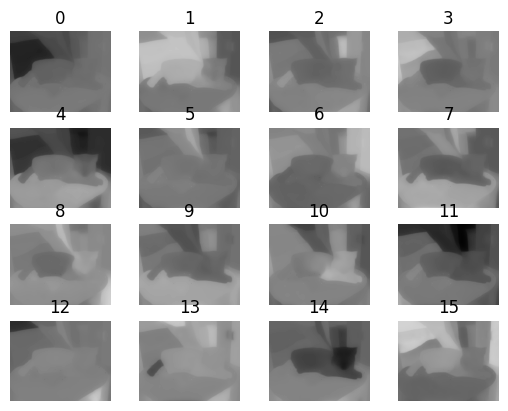

In [1]:
import numpy as np
import matplotlib.pyplot as plt

feats = np.load('feats.npy')
F, H, W = feats.shape
# feats is F, H, W
sqrtF = int(np.ceil(np.sqrt(F)))
for f in range(F):
    plt.subplot(sqrtF, sqrtF, f+1)
    plt.imshow(feats[f], cmap='gray')
    plt.axis('off')
    plt.title(f)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 499.5, 399.5, -0.5)

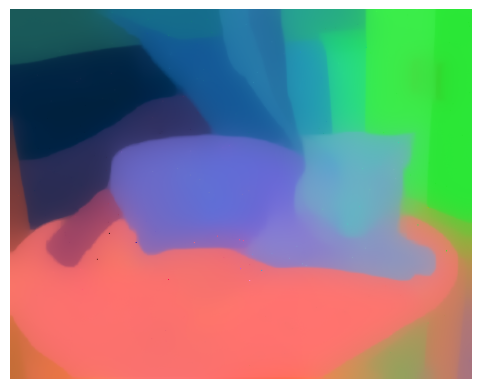

In [2]:
# we will PCA them to 3d and show the image
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
rgbfeats = pca.fit_transform(feats.reshape(F, H*W).T)
rgbfeats = rgbfeats.reshape(H, W, 3)

minmaxnorm = lambda x: (x - x.min()) / (x.max() - x.min())
def pct_norm(x, pct=1):
    return (x - np.percentile(x,pct)) / (np.percentile(x, 100-pct) - np.percentile(x, pct))
plt.imshow(pct_norm(rgbfeats))
plt.axis('off')


(-0.5, 499.5, 399.5, -0.5)

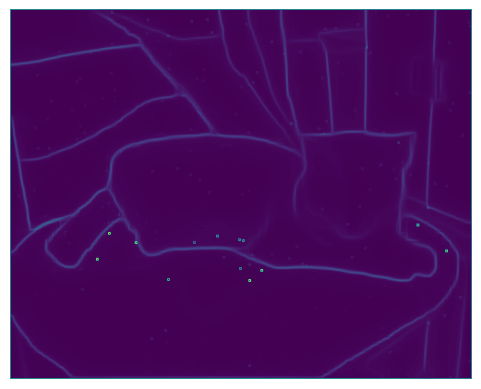

In [3]:
# we can also show the borders
import torch
def get_gradients(pred):
    F, H, W = pred[0].shape
    sobel_x = (
        torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).float().to(pred.device)
    )
    sobel_y = sobel_x.T
    sobel_x = sobel_x.repeat(F, 1, 1, 1)
    sobel_y = sobel_y.repeat(F, 1, 1, 1)
    edge_x = torch.nn.functional.conv2d(pred, sobel_x, padding=1, groups=F).view(
        F, H, W
    )  # 1, F, H, W
    edge_y = torch.nn.functional.conv2d(pred, sobel_y, padding=1, groups=F).view(
        F, H, W
    )
    edge_x = torch.norm(edge_x, dim=0, p=2)  # will take sqrt
    edge_y = torch.norm(edge_y, dim=0, p=2)  # H, W
    return edge_x, edge_y

def sobel_from_pred(pred):
    edge_x, edge_y = get_gradients(pred)
    edge = torch.sqrt(edge_x**2 + edge_y**2)
    return edge

edge = sobel_from_pred(torch.from_numpy(feats[None]))
plt.imshow(edge.numpy())
plt.axis('off')

Contact me if you need an expert opinon or solution for your data-science or computer vision problem. Money-back if I can't help.
I am an AI researcher with expertise in machine learning. My PhD is in computer vision. My work involved: 
SLB (energy): computer vision and image processing for diverse usecases (segmentation, crack detection, uncertainty estimation, active learning, interactive image segmentation, image processing, etc.). I've solved problems that were unsolved for years in weeks.
Kayrros (remote sensing): numerous projects regarding earth resource monitoring and emissions.
Numerai (finance): forecasting stock rankings from anonymized data. 
Huawei (tech): computational photography, worked with reinforcement learning applied to photo enhancement. I improved the efficiency of an enhancement method 10x. 
Solar Energy Lab (research lab): research on solar forecasting, developed the system in use in Uruguay in record time and leaded the creation of the best method in the world ( https://www.sciencedirect.com/science/article/abs/pii/S0038092X23004450 )
UTE (energy): electrical utility company. Developed non-intrusive load monitoring methods and measuring devices.
UdelaR (teaching): taught undergraduate and graduate courses (statistical signal processing, machine learning foundations).
Languages: English, French, Spanish, Italian, Portuguese. 